# **CS6.201: Introduction to Software Systems**
# **Python Session - 2**
# **Lab Activity - 6 (20 marks)**


# Final Directory Structure

```bash
📂 .
├── 📂 2024xxxxxx
│   ├── 📂 conways_grid_output
│   │   ├── 📄 output_0.npy
│   │   ├── 📄 output_1.npy
│   │   └── 📄 output_2.npy
│   ├── 📂 plots
│   │   ├── 🖼️ fractal_tree.png
│   │   ├── 🖼️ julia.png
│   │   ├── 🖼️ julia_grid.png
│   │   └── 🖼️ mandelbrot.png
├── 📂 conways_grid_initial
│   ├── 📄 grid_0.npy
│   ├── 📄 grid_1.npy
│   └── 📄 grid_2.npy
├── 📄 fractal_init.json
└── 📓 main.ipynb

```

#### NAME:

#### Enter your Roll Number
**Note:** Type it as an integer without any spaces or special characters.


In [2]:
ROLL_NUMBER = 2024113009

In [3]:
!pip install numpy matplotlib IPython

In [4]:
import os

os.makedirs(str(ROLL_NUMBER), exist_ok=True)

#### **Note:** A key skill in using `Python packages` is reading its documentation. You have been provided with names of all the necessary `NumPy` and `matplotlib` functions required to complete the activity, except for those already covered in the lab. We expect you to refer to the documentation to understand how they work.

---

## **Question 1: Game of Life Simulation in Python [6 marks]**

### **Overview**
In this activity, you will implement Conway's Game of Life, a cellular automaton that evolves over discrete time steps. The game consists of a grid where each cell can be either **alive (1)** or **dead (0)**. The evolution of the grid follows simple rules based on the number of **live neighbors** each cell has.

Your task is to implement three key functions that will initialize the grid, count the live neighbors for each cell, and update the grid according to the rules.

<br>

### **Game of Life Rules**
Each cell in the grid has **eight neighboring cells** (except for the edges). The next state of a cell is determined as follows:

1. **A live cell (`1`) remains alive** if it has **2 or 3 live neighbors**.
2. **A live cell (`1`) dies** if it has **fewer than 2 neighbors (underpopulation)** or **more than 3 neighbors (overpopulation)**.
3. **A dead cell (`0`) becomes alive** if it has **exactly 3 neighbors (reproduction)**.

<br>

### **Tasks**
You need to implement the following three functions:

#### **1. `initialize_grid(n)`**
This function creates an `n x n` grid, where each cell is randomly assigned as either **alive (`1`)** or **dead (`0`)**. 

#### **2. `count_live_neighbors(grid, x, y, n)`**
This function counts the number of **alive (`1`)** neighbors surrounding a given cell at position `(x, y)`. It ensures that only valid neighboring cells within the grid boundaries are considered. The function returns the total count of live neighbors.


#### **3. `update_grid(grid, n)`**
This function updates the grid by applying the **Game of Life** rules to each cell. It uses the `count_live_neighbors` function to determine the number of live neighbors for each cell and updates the grid accordingly. The function returns the updated grid.

#### **Game of Life Rules**
- **A live cell (`1`) stays alive** if it has **2 or 3 live neighbors**; otherwise, it dies (`0`).
- **A dead cell (`0`) becomes alive** if it has **exactly 3 live neighbors**.
- **All cells update at the same time**, meaning that the changes from this iteration do not influence the updates of other cells. Each cell's new state is determined based on the original grid before any updates are applied.


**Note:** The functions that are already implemented are none of your concern. You just need to implement the three functions mentioned above.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import time
from IPython import display
import os
import json

np.random.seed(ROLL_NUMBER)

In [6]:
def imshow_helper(board, sleepSeconds=0.5):
    plt.imshow(board, cmap="binary", interpolation="none")
    plt.axis('off')
    display.display(plt.gcf())
    display.clear_output(wait=True)
    time.sleep(sleepSeconds)


def display_grid(grid, sleepSeconds=0.5):
    imshow_helper(grid, sleepSeconds)


def run(n, iterations=10, delay=0.1):
    """
    Run the Game of Life simulation.

    Parameters:
    n (int): The size of the grid (n x n).
    iterations (int): The number of iterations to run the simulation.
    delay (float): Time to wait between iterations.
    """
    grid = initialize_grid(n)

    for _ in range(iterations):
        display_grid(grid)  # Display the current grid
        grid = update_grid(grid, n)  # Pass n to update_grid
        time.sleep(delay)

    check_life()


def check_life():
    """
    Check the output files for correctness.

    Parameters:
    ROLL_NUMBER (str): The roll number to use for the output path.
    """
    
    OUTPUT_PATH = f'{ROLL_NUMBER}/conways_grid_output'
    os.makedirs(OUTPUT_PATH, exist_ok=True)

    assert os.path.exists(OUTPUT_PATH), f'Output path {OUTPUT_PATH} not found'
    assert os.path.exists('conways_grid_initial'), f'Initial grid folder not found'

    np.random.seed(42)
    for i in range(3):
        if i == 0:
            print('Checking your output. Please wait...')
        elif i == 1:
            print('It\'s taking longer than expected. Please be patient...')
        else:
            print('Almost there...')
        assert os.path.exists(f'conways_grid_initial/grid_{i}.npy'), f'Initial grid_{i} not found'
        check_grid = np.load(f'conways_grid_initial/grid_{i}.npy')

        for _ in range(10):
            check_grid = update_grid(check_grid, check_grid.shape[0])

        np.save(f'{OUTPUT_PATH}/output_{i}.npy', check_grid)
        assert os.path.exists(f'{OUTPUT_PATH}/output_{i}.npy'), f'Output file for grid_{i} not found'
    np.random.seed(ROLL_NUMBER)

### === YOUR CHANGES START HERE ===
Write your code for the functions and run the cell to get the output. 

Checking your output. Please wait...
It's taking longer than expected. Please be patient...
Almost there...


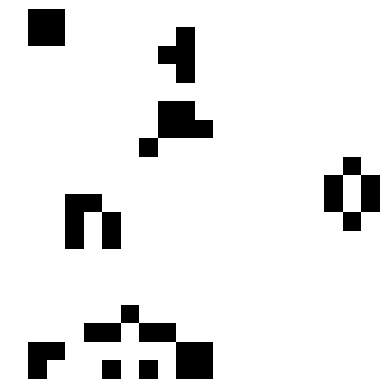

In [7]:
# NOTE: complete the initialize_grid, count_live_neighbors, and update_grid functions

def initialize_grid(n):
    """
    Create a random grid of size n x n.

    Parameters:
    n (int): The size of the grid (n x n).

    Returns:
    np.ndarray: A randomly initialized grid of size n x n filled with boolean values.
    """

    # your code goes here

    return np.random.choice([0,1], size=(n,n))

    # return the grid
    # delete the pass statement before writing the code


def count_live_neighbors(grid, x, y, n):
    """
    Count the live neighbors of cell (x, y).

    Parameters:
    grid (np.ndarray): The current grid.
    x (int): The x-coordinate of the cell.
    y (int): The y-coordinate of the cell.
    n (int): The size of the grid (n x n).

    Returns:
    int: The count of live neighbors around the cell (x, y).
    """

    # your code goes here

    neighbors = [(i,j) for i in range(x-1, x+2) for j in range(y-1, y+2) 
                 if ((i,j) != (x,y) and (i >= 0 and i < n) and (j >= 0 and j < n))]
    return sum(grid[i][j] for i,j in neighbors)

    # return the count of live neighbors
    # delete the pass statement before writing the code
    


def update_grid(grid, n):
    """
    Update the grid according to the rules of the game.

    Parameters:
    grid (np.ndarray): The current grid.
    n (int): The size of the grid (n x n).

    Returns:
    np.ndarray: The updated grid.
    """

    # your code goes here


    updatedGrid = np.copy(grid)
    for i in range(n):
        for j in range(n):
            liveN = count_live_neighbors(grid, i, j, n)
            if (grid[i][j] == 1 and (liveN < 2 or liveN > 3)):
                updatedGrid[i][j] = 0
            elif grid[i, j] == 0 and liveN == 3:
                updatedGrid[i][j] = 1

    return updatedGrid
    # return the updated grid
    # delete the pass statement before writing the code
    

N = 20
run(N, iterations=10, delay=0.2)

### === YOUR CHANGES END HERE ===

---

# **Question 2: Fractal Visualization using Matplotlib [3 marks]**
You need to complete the function `plot_fractal` to visualize fractal data using Matplotlib. You will then use this function to plot two well-known fractals: the **Mandelbrot Set** and the **Julia Set** with specified color maps and titles.  

## **Instructions**
1. **Complete the function `plot_fractal`**  
   - The function should take three parameters:  
     - `data`: A 2D array representing the fractal image.  
     - `cmap`: A string representing the colormap to use.  
   - The function should create a figure using the `plt.figure()` with figure size `10x10` function, display the fractal using `plt.imshow()`, remove axis labels, and display the image. Ensure the image does not have a title. Also use the `tight_layout()` function to adjust the spacing.

2. **Use the completed `plot_fractal()` function to generate the following plots:**  
   - Plot `mandelbrot_data` with `hot` colormap.  
   - Plot `julia_data` with `inferno` colormap.

3. Save the plots as `mandelbrot.png` and `julia.png` respectively using the `plt.savefig()` function with a resolution of `300 dpi` in the `<ROLL_NUMBER>/plots` directory.

**Note:** `mandelbrot_data` and `julia_data` are calculated in the next two cells. You do not need to modify them to complete the task. Write your code in the cell containing the `plot_fractal()` function.



In [13]:
# NOTE: You don't need to understand or modify the code below. It is just helper functions to generate the fractals.

def mandelbrot(c, max_iter):
    z = c
    for n in range(max_iter):
        if abs(z) > 2:
            return n
        z = z*z + c
    return max_iter

def mandelbrot_set(xmin, xmax, ymin, ymax, width, height, max_iter):
    r1 = np.linspace(xmin, xmax, width)
    r2 = np.linspace(ymin, ymax, height)
    n3 = np.empty((width, height))
    for i in range(width):
        for j in range(height):
            n3[i, j] = mandelbrot(r1[i] + 1j*r2[j], max_iter)
    return n3

def julia(c, max_iter):
    def func(z):
        for n in range(max_iter):
            if abs(z) > 2:
                return n
            z = z*z + c
        return max_iter
    return func

def julia_set(xmin, xmax, ymin, ymax, width, height, c, max_iter):
    r1 = np.linspace(xmin, xmax, width)
    r2 = np.linspace(ymin, ymax, height)
    n3 = np.empty((width, height))
    julia_func = julia(c, max_iter)
    for i in range(width):
        for j in range(height):
            n3[i, j] = julia_func(r1[i] + 1j*r2[j])
    return n3

def check_fractals():
    assert os.path.exists(f'{ROLL_NUMBER}/plots/mandelbrot.png'), f'{ROLL_NUMBER}/plots/mandelbrot.png image not found'
    assert os.path.exists(f'{ROLL_NUMBER}/plots/julia.png'), 'julia.png image not found'

    img = plt.imread(f'{ROLL_NUMBER}/plots/mandelbrot.png')
    assert img is not None, f'{ROLL_NUMBER}/plots/mandelbrot.png image not found'
    assert img.shape[0] == 3000 and img.shape[1] == 3000 and img.shape[2] == 4, f'{ROLL_NUMBER}/plots/mandelbrot.png image has incorrect dimensions'

    img = plt.imread(f'{ROLL_NUMBER}/plots/julia.png')
    assert img is not None, 'julia.png image not found'
    assert img.shape[0] == 3000 and img.shape[1] == 3000 and img.shape[2] == 4, f'{ROLL_NUMBER}/plots/julia.png image has incorrect dimensions'

In [14]:
# NOTE: You don't need to understand or modify the code below. It is just generating the data for plotting the fractals.

# Parameters
xmin, xmax, ymin, ymax = -2.0, 2.0, -2.0, 2.0
width, height = 1000, 1000
max_iter = 256

# Mandelbrot set
mandelbrot_data = mandelbrot_set(xmin, xmax, ymin, ymax, width, height, max_iter)

# Julia set
c = complex(-0.7, 0.27015)
julia_data = julia_set(xmin, xmax, ymin, ymax, width, height, c, max_iter)


# Multiple Julia sets
c_values = [complex(-0.7, 0.27015), complex(0.355, 0.355), complex(-0.4, 0.6), complex(0.37, -0.1)]
julia_data_list = []
for c in c_values:
    new_julia_data = julia_set(xmin, xmax, ymin, ymax, width, height, c, max_iter)
    julia_data_list.append(new_julia_data)

os.makedirs(f'{ROLL_NUMBER}/plots', exist_ok=True)

### === YOUR CHANGES START HERE ===

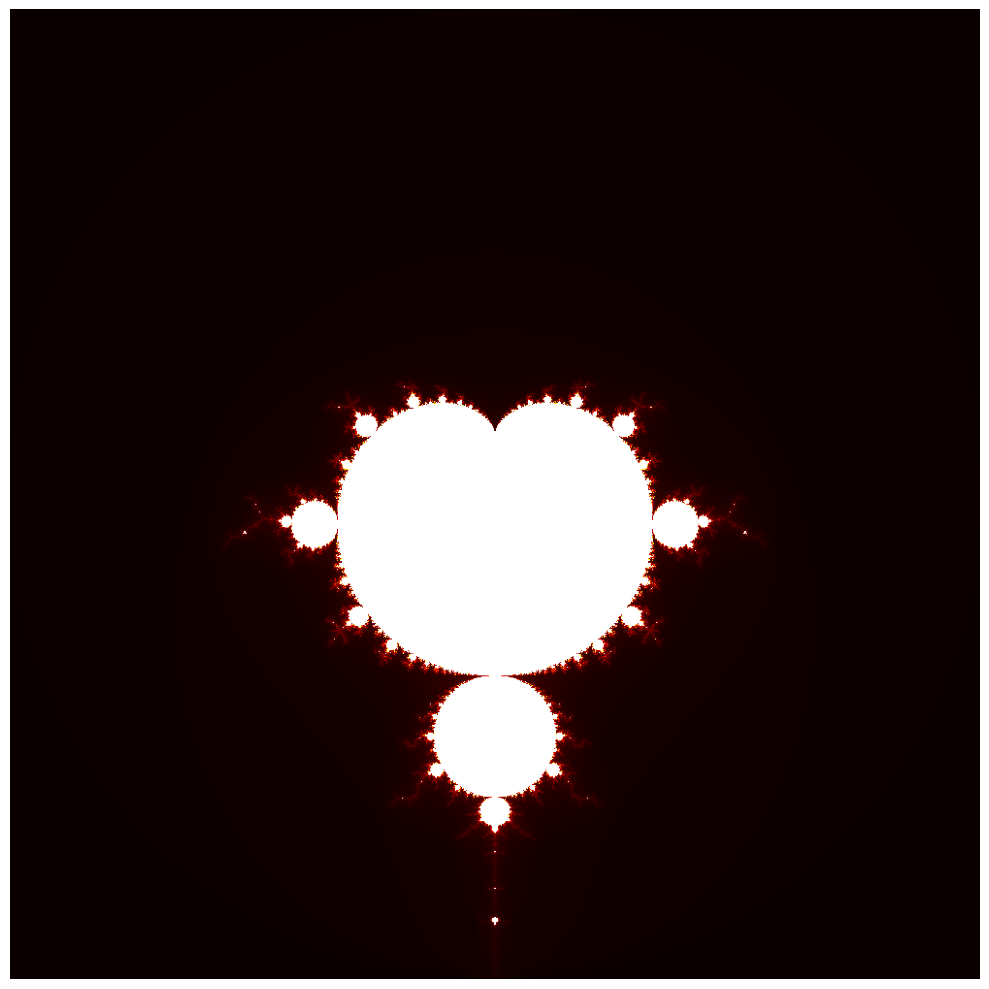

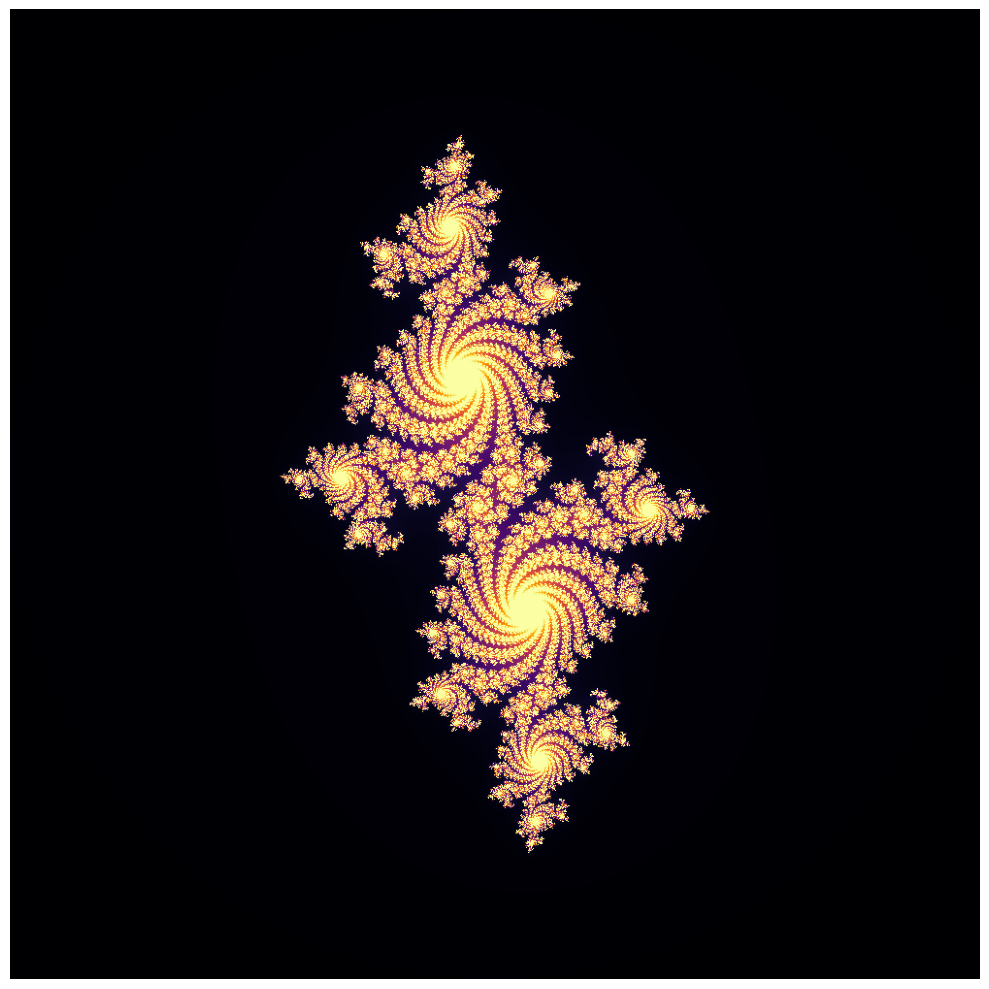

In [16]:
# NOTE: Complete the plot_fractal function and plot the Mandelbrot and Julia set using the data already generated above.

def plot_fractal(data, cmap, filename):
    """
    Visualize fractal data using Matplotlib.

    Parameters:
    data (2D array): A 2D array representing the fractal image.
    cmap (str): A string representing the colormap to use.
    filename (str): The filename to save the plot.
    """

    # your code goes here
    plt.figure(figsize=(10,10))
    plt.imshow(data, cmap=cmap, origin="lower")
    plt.axis("off")
    plt.tight_layout()
    plt.savefig(f"{ROLL_NUMBER}/plots/{filename}",dpi=300)
   
    # delete the pass statement before writing the code
    


# your code goes here
plot_fractal(mandelbrot_data, "hot", "mandelbrot.png")
plot_fractal(julia_data, "inferno", "julia.png")
# use plot_fractal function to plot the Mandelbrot set using the variable mandelbrot_data
# call the plot_fractal function here with the appropriate parameters

# use plot_fractal function to plot the Julia set using the variable julia_data
# call the plot_fractal function here with the appropriate parameters


check_fractals()

### === YOUR CHANGES END HERE ===

---

# **Question 3: Plotting the Julia Sets in a 2x2 Grid [4 marks]**

In this task, you will create a **2x2 grid** of subplots to visualize all four Julia Sets present in `julia_data_list` in one figure. This will allow you to view the Julia Sets side-by-side in a single comprehensive display.  

## **Instructions**  

1. **Use `plt.subplot` or `plt.subplots`:**  
   To arrange the four plots in a 2x2 grid, you should use `plt.subplot` or `plt.subplots`.  
   - `plt.subplot(rows, cols, index)` allows you to define a specific position in a grid of plots.  
   - Alternatively, `plt.subplots` can be used to create a grid layout and return axes objects, making it easier to manage each plot’s attributes.  

2. **Create a figure with size `20x20`:**  
   - No subplot should have a title.
   - Use `inferno` as the colormap for all the subplots.  
   - Remove axis labels for a cleaner visualization.  

3. **Arrange the plots in a 2x2 grid as follows:**  

      | **julia_data_list[0]** | **julia_data_list[1]** |
      |------------------------|------------------------|
      | **julia_data_list[2]** | **julia_data_list[3]** |

<br>

4. **Use `plt.tight_layout()`:**  
   - This function automatically adjusts subplot parameters to improve spacing between plots.  
   - Ensure that the plots are not overlapping or too close to each other.  

5. **Save the figure as `julia_grid.png` with a resolution of `300 dpi` in the `<ROLL_NUMBER>/plots` directory.**

### **BONUS**: Do it in the least number of lines of code. Our best was 10 lines of code. Can you do better?

The bonus will fetch you 2 extra marks to your total score in the activity. The total score will be capped at 20 marks.

<!-- #### `Hint:`  Think about how to determine subplot positions dynamically using indices.   -->

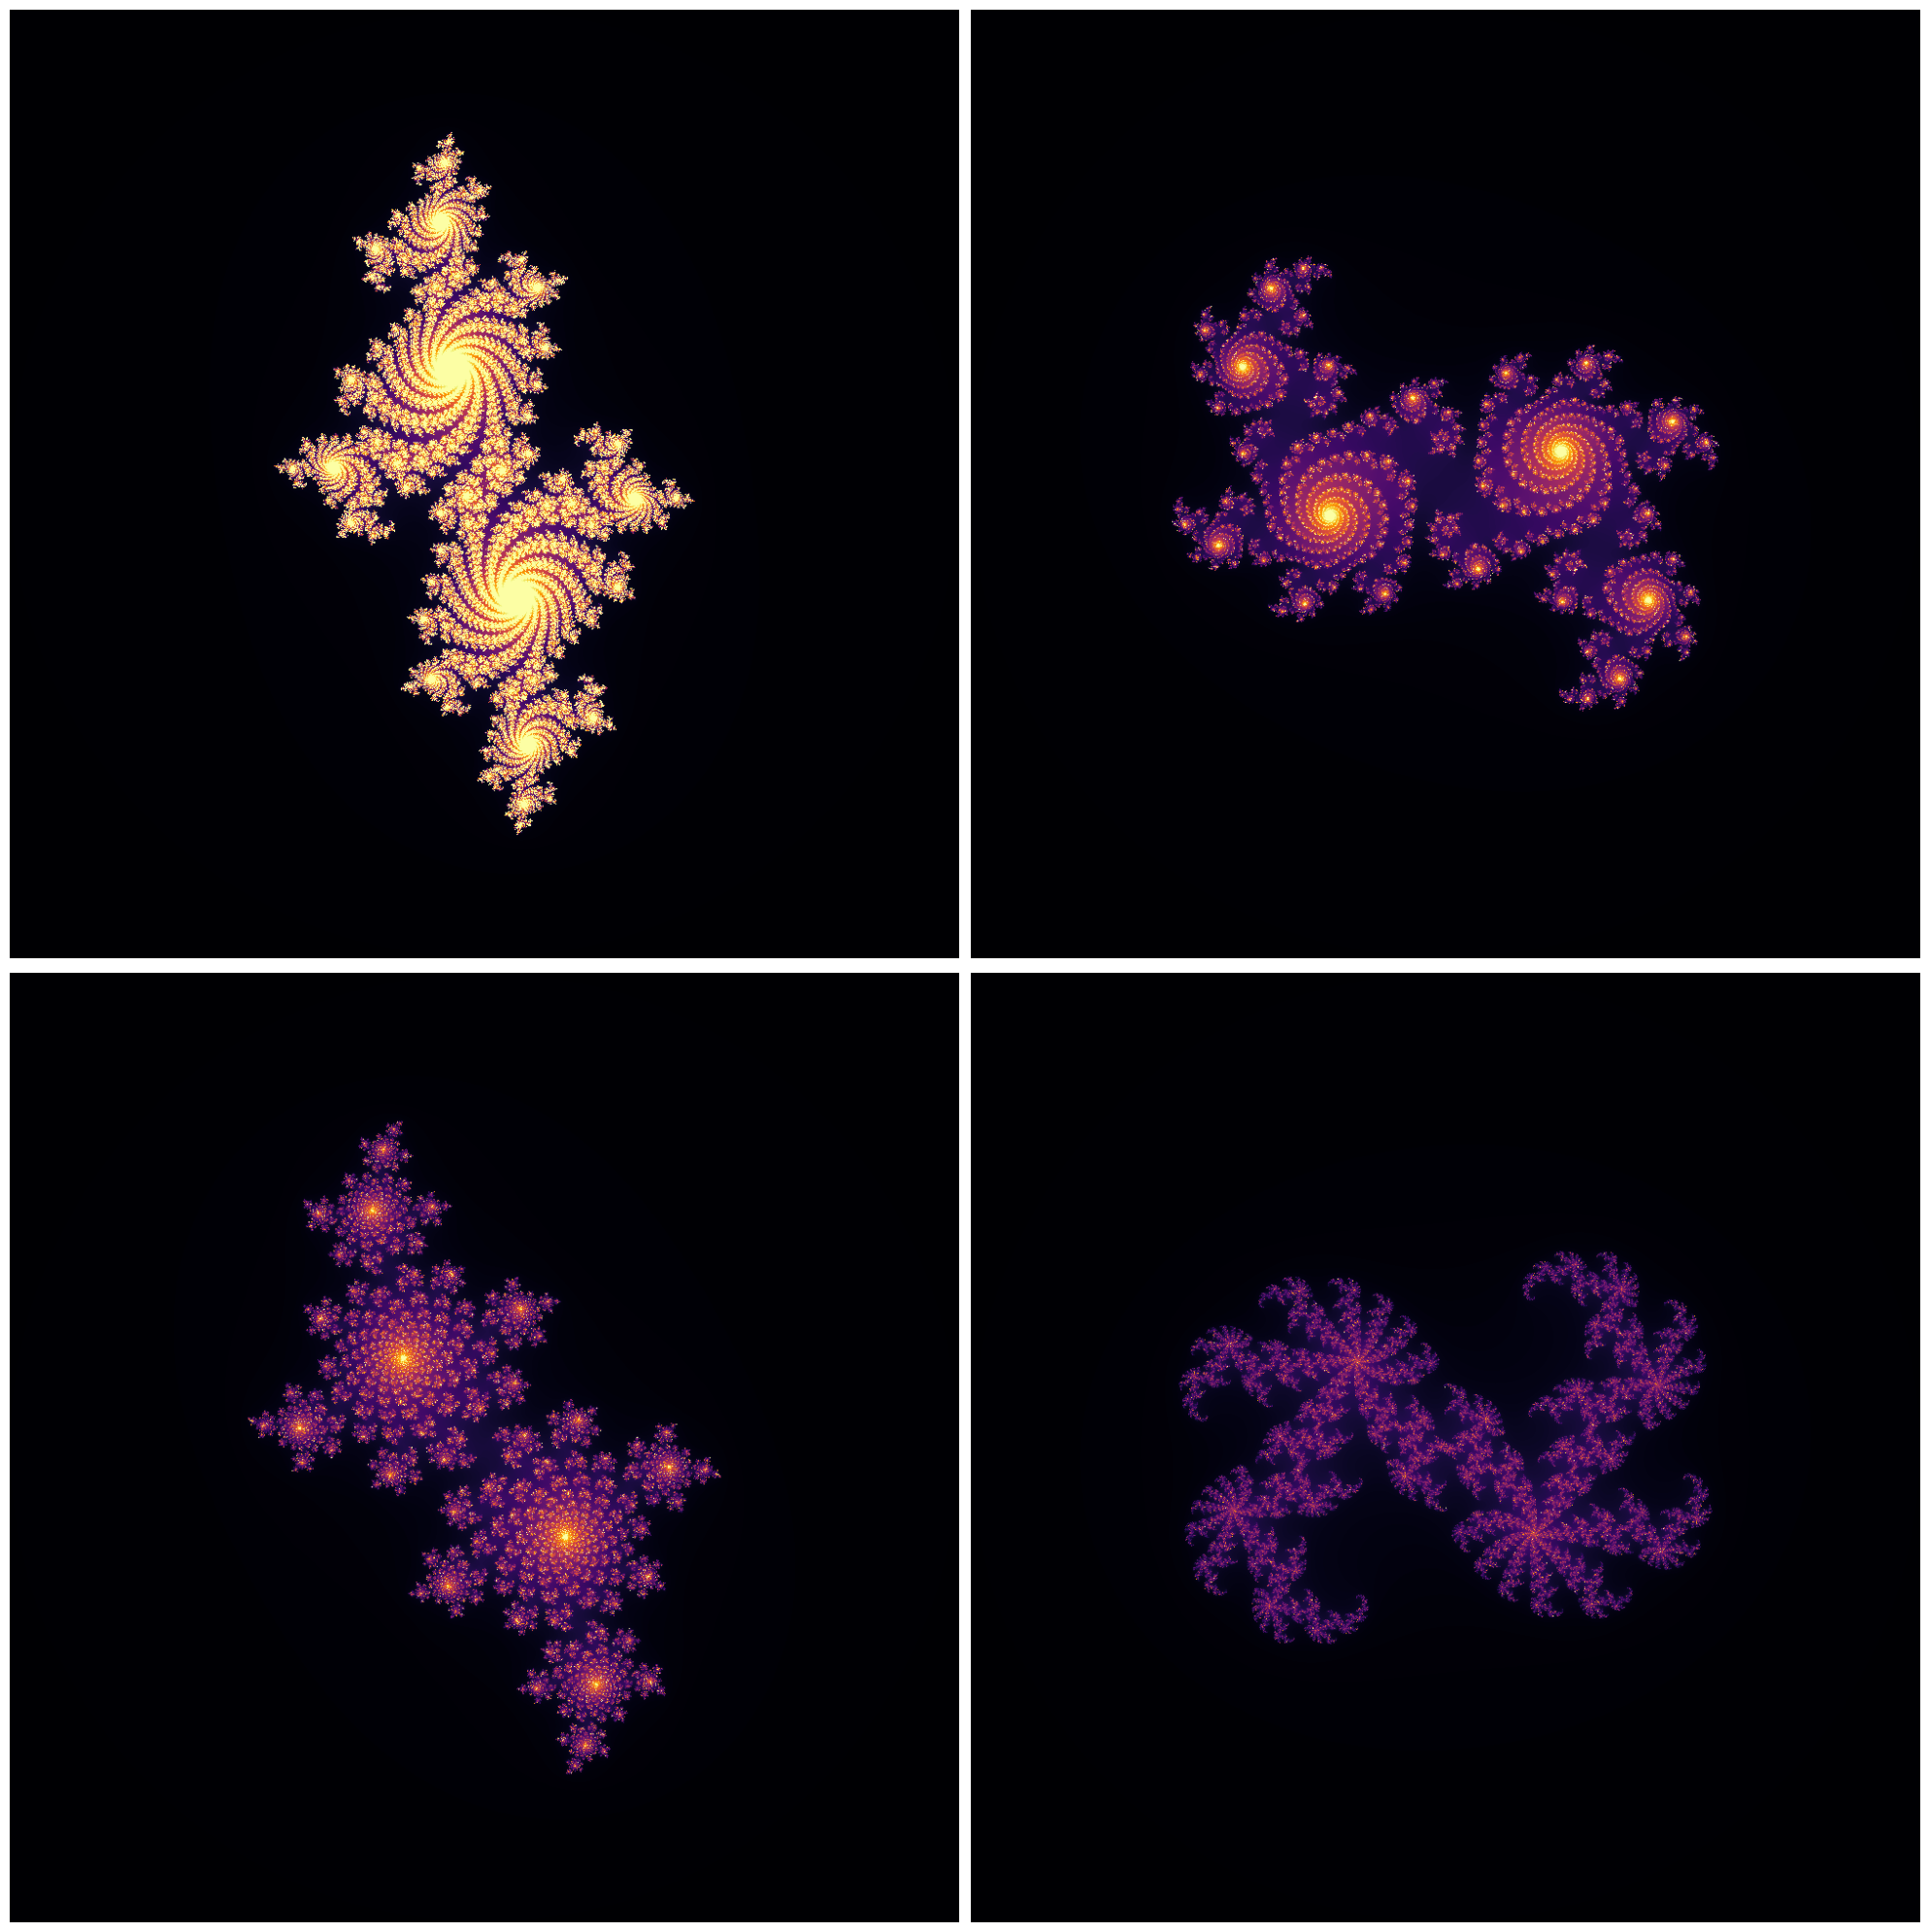

In [24]:
def check_julia():
    assert os.path.exists(f'{ROLL_NUMBER}/plots/julia_grid.png'), f'{ROLL_NUMBER}/plots/julia_grid.png not found'
    img = plt.imread(f'{ROLL_NUMBER}/plots/julia_grid.png')
    assert img is not None, f'{ROLL_NUMBER}/plots/julia_grid.png image not found'
    assert img.shape[0] == 6000 and img.shape[1] == 6000 and img.shape[2] == 4, f'{ROLL_NUMBER}/plots/julia_grid.png image has incorrect dimensions'


###### Changes start here ######

# your code goes here

plot, axes = plt.subplots(2,2, figsize=(20,20))
# for index, myAxis in enumerate(axes.flat):
#     myAxis.imshow(julia_data_list[index], cmap="inferno", origin="lower")
#     myAxis.axis("off")

for i in range(2):
    for j in range(2):
        axes[i,j].imshow(julia_data_list[2*i+j], cmap="inferno", origin="lower")
        axes[i,j].axis("off")
        

plt.tight_layout()
plt.savefig(f"{ROLL_NUMBER}/plots/julia_grid.png", dpi=300)


###### Changes end here ######

check_julia()

---

# **Question 4: Fractal Trees [7 marks]**
In this task, you will implement a function to draw a fractal tree using recursion. The tree will consist of a trunk and branches that split into smaller branches. The function will take parameters to control the tree's depth, angle, and length, allowing you to create various tree structures.

## **Instructions**
1. Complete the function **`get_initial_values`** to get the initial values for the tree drawing. The function will return the starting coordinates, angle, length, and depth for the first branch. You need to do file handling to read the values from a json file.
    <!-- You need to use the `json` package to read the values from the file.
    Check the key names in the json file to help you resolve the KeyError. -->


<br>

2. Complete the function **`draw_branch`** to draw a fractal tree using recursion. The function will draw a branch based on the given parameters and then call itself to draw smaller branches. The recursion will continue until the specified depth is reached.

    The `draw_branch` function takes the following parameters:
    - `x` and `y`: The starting coordinates of the branch.
    - `angle`: The angle of the branch with respect to the horizontal axis.
    - `length`: The length of the branch.
    - `depth`: The current depth of the recursion.


In [27]:
def check_tree_output():
    assert os.path.exists(f'{ROLL_NUMBER}/plots/fractal_tree.png'), f'{ROLL_NUMBER}/plots/fractal_tree.png not found'
    img = plt.imread(f'{ROLL_NUMBER}/plots/fractal_tree.png')
    assert img is not None, f'{ROLL_NUMBER}/plots/fractal_tree.png image not found'


def draw_tree():
    """
    Draw a fractal tree using the draw_branch function.
    """
    # Parameters
    initial_length, initial_angle, recursion_depth = get_initial_parameters()

    # Initialize the plot
    plt.figure(figsize=(8, 8))
    plt.axis('off')
    plt.title("Fractal Tree")

    # Draw the fractal tree starting from the base
    draw_branch(0, 0, initial_length, initial_angle, recursion_depth)

    # Save the plot
    plt.savefig(f'{ROLL_NUMBER}/plots/fractal_tree.png')
    plt.show()

    check_tree_output()

### === YOUR CHANGES START HERE ===

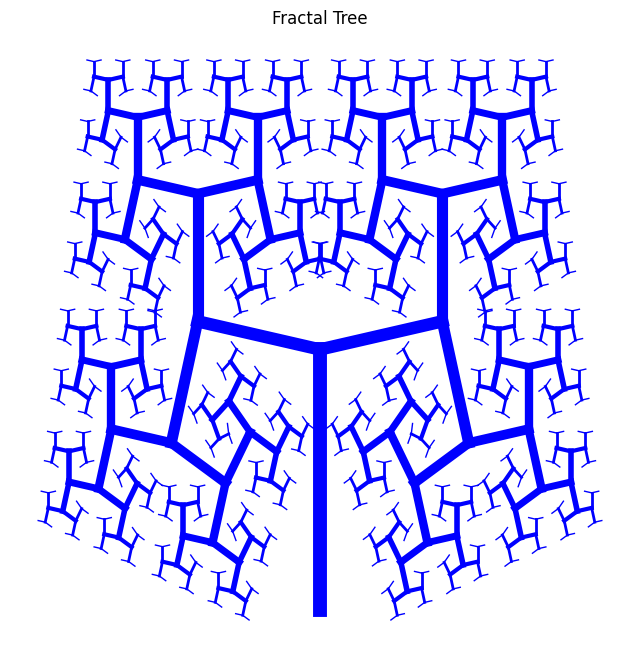

In [33]:
def get_initial_parameters():
    """
    This function reads the initial parameters from the 'fractal_init.json' file.

    Returns:
    initial_length (float): The initial length of the branch.
    initial_angle (float): The initial angle of the branch.
    recursion_depth (int): The depth of recursion for the fractal tree.
    """
    assert os.path.exists('fractal_init.json'), 'Initial parameters file not found'

    # your code goes here
    with open("fractal_init.json", "r") as f:
        data = json.load(f)
    try:
        iLength = data["length"]
        iAngle = data["angle"]
        depth = data["iterations"]
    except KeyError as e:
        raise KeyError(f"Missing key in JSON: {e}")
    return iLength, iAngle, depth
    # return initial_length, initial_angle, recursion_depth
    

def draw_branch(x, y, length, angle, depth):
    """
    Recursively draw a fractal tree. The drawing canvas is the same across all recursive calls - it is the global plt object.
    
    Parameters:
        x, y: Coordinates of the starting point.
        length: Length of the branch.
        angle: Current angle in radians.
        depth: Current recursion depth.
    """
    
    # your code goes here
    if (depth == 0):
        return;
    xEnd = x + length * np.cos((angle))
    yEnd = y + length * np.sin((angle))
    
    plt.plot([x, xEnd], [y, yEnd], 'blue', lw=depth)

    newLength = length * 0.7  
    newDepth = depth - 1 

    # Left branch
    draw_branch(xEnd, yEnd, newLength, angle + 30, newDepth)
    
    # Right branch
    draw_branch(xEnd, yEnd, newLength, angle - 30, newDepth)
    # delete the pass statement before writing the code
    


draw_tree()

### === YOUR CHANGES END HERE ===

----